This code is based on an assignment from the University of Michigan's Coursera course titled Applied Machine Learning in Python. I have expanded on the assignment a bit, adding different kinds of classifiers, ROC curves, performance assessments, etc.

**Skills demonstrated:** classification, scikit-learn, TensorFlow, model evaluation, general coding

This code trains one or more classifiers to assess how engaging videos from a dataset are based on seven features defined below. A video is classified as "engaging" if the median percentage of the video watched across all viewers was at least 30%.

Dataset: engagement_data.csv:

Features:

1. title_word_count - the number of words in the title of the video.

2. document_entropy - a score indicating how varied the topics are covered in the video, based on the transcript. Videos with smaller entropy scores will tend to be more cohesive and more focused on a single topic.

3. freshness - The number of days elapsed between 01/01/1970 and the lecture published date. Videos that are more recent will have higher freshness values.

4. easiness - A text difficulty measure applied to the transcript. A lower score indicates more complex language used by the presenter.

5. fraction_stopword_presence - A stopword is a very common word like 'the' or 'and'. This feature computes the fraction of all words that are stopwords in the video lecture transcript.

6. speaker_speed - The average speaking rate in words per minute of the presenter in the video.

7. silent_period_rate - The fraction of time in the lecture video that is silence (no speaking).

Target variable:

1. engagement - Target label for training. True if learners watched a substantial portion of the video (see description), or False otherwise.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from engage_utils import *

Prepare data using data_prep()

In [2]:
X_train, X_test, y_train, y_test = data_prep(pd.read_csv('engagement_data.csv'))

Train and test an SVC classifier using engagement_model_SVM()

In [3]:
rec_svc, svc = engagement_model_SVM(X_train, X_test, y_train, y_test)

Train and test a logistic regression classifier using engagement_model_logReg()

In [4]:
rec_lr, lr, cols, coefs = engagement_model_logReg(X_train, X_test, y_train, y_test)

With a linear model (or linear kernel, in the case of SVMs), we can assess the importance of each feature by looking at the magnitude of each coefficient in the model fitted from the data:

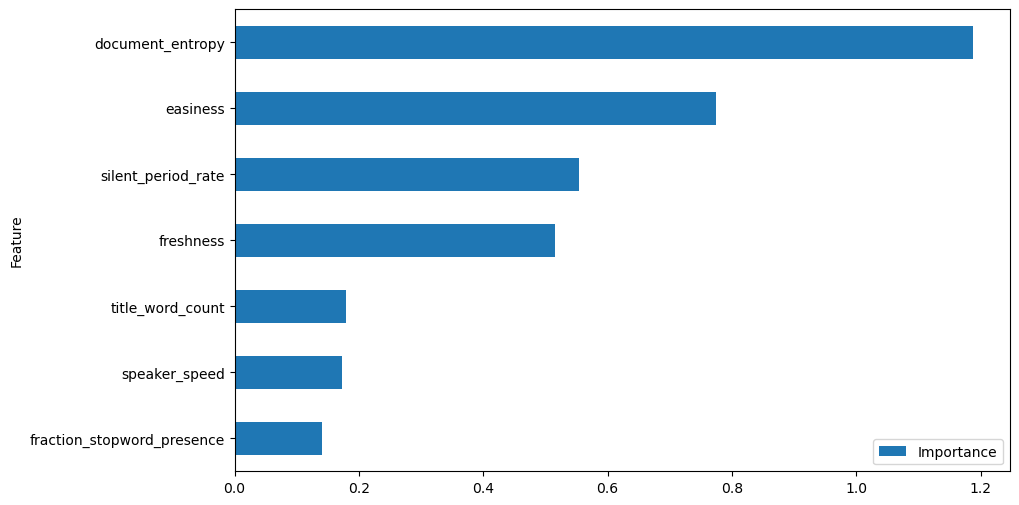

In [5]:
if (coefs is not None):
    feature_importance = pd.DataFrame({'Feature': cols, 'Importance': np.abs(coefs)}).sort_values('Importance')
    feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

From the above figure, we can see that document_entropy (a measue of the number of topics covered in the video) and easiness (simpler language) tend to influence viewer engagement more than speaker_speed and fraction_stopword_presence (fraction of common words like "the" and "and").

Train and test a shallow neural network classifier using engagement_model_NN()

In [6]:
rec_NN, NN = engagement_model_NN(X_train, X_test, y_train, y_test)
#print(rec_NN)

Epoch 1/10
109/109 [==============================] - 1s 5ms/step - loss: 0.3582 - auc: 0.6364 - val_loss: 0.2509 - val_auc: 0.8389
Epoch 2/10
109/109 [==============================] - 0s 2ms/step - loss: 0.2348 - auc: 0.8483 - val_loss: 0.2313 - val_auc: 0.8692
Epoch 3/10
109/109 [==============================] - 0s 2ms/step - loss: 0.2156 - auc: 0.8713 - val_loss: 0.2227 - val_auc: 0.8740
Epoch 4/10
109/109 [==============================] - 0s 3ms/step - loss: 0.2062 - auc: 0.8779 - val_loss: 0.2169 - val_auc: 0.8785
Epoch 5/10
109/109 [==============================] - 0s 2ms/step - loss: 0.2011 - auc: 0.8869 - val_loss: 0.2199 - val_auc: 0.8864
Epoch 6/10
109/109 [==============================] - 0s 2ms/step - loss: 0.1944 - auc: 0.8895 - val_loss: 0.2087 - val_auc: 0.8870
Epoch 7/10
109/109 [==============================] - 0s 3ms/step - loss: 0.1891 - auc: 0.8994 - val_loss: 0.2064 - val_auc: 0.8920
Epoch 8/10
109/109 [==============================] - 0s 4ms/step - loss: 0.

Compute and plot ROC curves, labeling the point on the curve that minimizes the distance to the upper-left corner (fpr=0, tpr=1) of the plot

In [7]:
fpr_svc, tpr_svc, opt_svc = roc_info(y_test,rec_svc)
fpr_lr, tpr_lr, opt_lr = roc_info(y_test,rec_lr)
fpr_nn, tpr_nn, opt_nn = roc_info(y_test,rec_NN)

roc_plotter(fpr_svc, tpr_svc, opt_svc,'SVC')
roc_plotter(fpr_lr, tpr_lr, opt_lr, 'Logistic regression')
roc_plotter(fpr_nn, tpr_nn, opt_nn, 'Neural Network')

Compute and return the ROC_AUC and accuracy scores of each classifier

In [10]:
#print(y_pred > 0.1)
svc_auc = roc_auc_score(y_test, rec_svc)
svc_acc = accuracy_score(y_test, (rec_svc > opt_svc[2]))
lr_auc = roc_auc_score(y_test, rec_lr)
lr_acc = accuracy_score(y_test, (rec_lr >  opt_lr[2]))
nn_auc = roc_auc_score(y_test,rec_NN)
nn_acc = accuracy_score(y_test,(rec_NN > opt_nn[2]))

print('We can compare the AUC and accuracy scores of each model:')

print(f'SVC AUC score: {svc_auc:.3f}')
print(f'SVC accuracy score at optimal probability threshold: {svc_acc:.3f}')

print(f'LogisticRegression AUC score: {lr_auc:.3f}')
print(f'LogisticRegression accuracy score at optimal probability threshold: {lr_acc:.3f}')

print(f'Neural network AUC score: {nn_auc:.3f}')
print(f'Neural network accuracy score at optimal probability threshold: {nn_acc:.3f}')


We can compare the AUC and accuracy scores of each model:
SVC AUC score: 0.840
SVC accuracy score at optimal probability threshold: 0.792
LogisticRegression AUC score: 0.824
LogisticRegression accuracy score at optimal probability threshold: 0.800
Neural network AUC score: 0.887
Neural network accuracy score at optimal probability threshold: 0.868
